In [1]:
#!import "PackAndLoad.dib"

open ChickenScratch

local-638653525385014809

MSBuild version 17.9.8+610b4d3b5 for .NET
  Determining projects to restore...
  Restored C:\Dev\ChickenScratch\src\ChickenScratch\ChickenScratch.fsproj (in 178 ms).
  Restored C:\Dev\ChickenScratch\src\Testing.ChickenScratch\Testing.ChickenScratch.fsproj (in 178 ms).
  Restored C:\Dev\ChickenScratch\src\ChickenScratch.Interactive\ChickenScratch.Interactive.fsproj (in 196 ms).
  ChickenScratch -> C:\Dev\ChickenScratch\src\ChickenScratch\bin\Debug\netstandard2.1\ChickenScratch.dll
  Successfully created package 'C:\Dev\ChickenScratch\src\ChickenScratch\bin\Debug\ChickenScratch.1.3.0-local-638653525385014809.nupkg'.
  ChickenScratch.Interactive -> C:\Dev\ChickenScratch\src\ChickenScratch.Interactive\bin\Debug\net8.0\ChickenScratch.Interactive.dll
  Successfully created package 'C:\Dev\ChickenScratch\src\ChickenScratch.Interactive\bin\Debug\ChickenScratch.Interactive.1.3.0-local-638653525385014809.nupkg'.


Restore sources C:/Dev/ChickenScratch/src/ChickenScratch.Interactive/bin/Debug C:/Dev/ChickenScratch/src/ChickenScratch/bin/Debug Installed Packages ChickenScratch.Interactive, 1.3.0-local-638653525385014809

Loading extension script from `C:\Users\dave\.nuget\packages\chickenscratch.interactive\1.3.0-local-638653525385014809\interactive-extensions\dotnet\extension.dib`


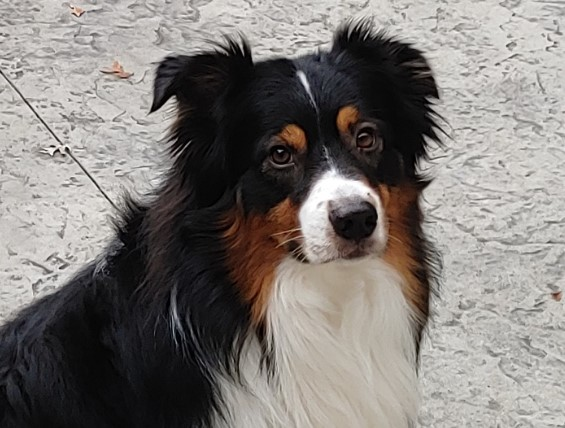

In [2]:
module Test = 
    open ChickenScratch.HtmlExpressions

    let doc = div {
        ScratchImage.FromFile "1.jpg"
    }
    
Test.doc

<div>
    
</div>
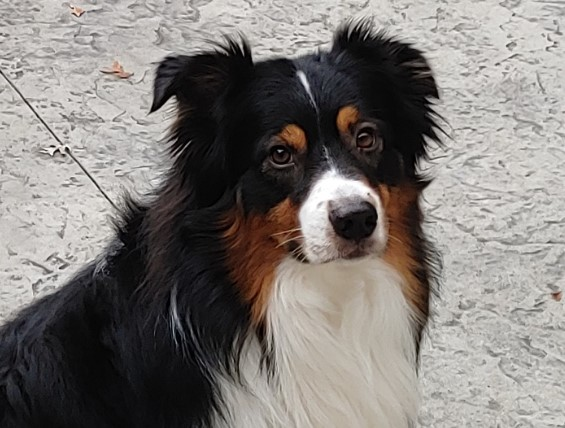

In [3]:
Test.doc.ToString()


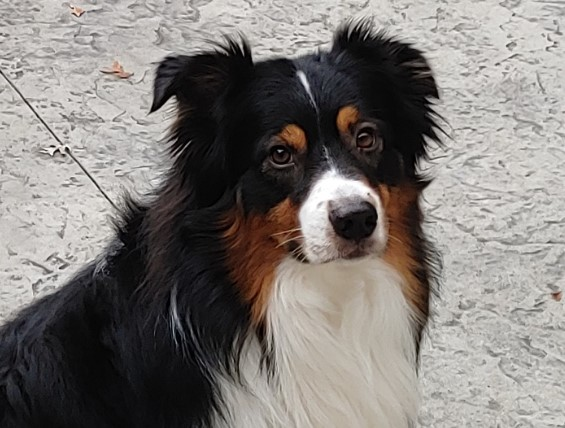

In [4]:
module Test2 = 
    open ChickenScratch.HtmlExpressions

    let myImg = ScratchImage.FromFile "1.jpg" |> ScratchImage.WithPrototype (img { _class "borderedImage" })

    let doc = div {                
        myImg |> ScratchImage.AsStyle
        style { ".borderedImage { border: solid 5px green }" }

        ul {
            li { myImg |> ScratchImage.AsInstance }
            li { myImg |> ScratchImage.WithPrototype (img { _width "200px" }) |> ScratchImage.AsInstance }            
            li { myImg |> ScratchImage.WithPrototype (img { _width "100px" ; _class "borderedImage" }) |> ScratchImage.AsInstance }            
        }
    }

Test2.doc

<div>
    <style>
        .scratch-image-54e9fab1-f2c7-4662-8b38-a5bd36ed8f22 { content: url("") }
    </style>
    <style>.borderedImage { border: solid 5px green }</style>
    <ul>
        <li><img class="borderedImage scratch-image-54e9fab1-f2c7-4662-8b38-a5bd36ed8f22"/></li>
        <li><img class="scratch-image-54e9fab1-f2c7-4662-8b38-a5bd36ed8f22" width="200px"/></li>
        <li>
            <img class="borderedImage scratch-image-54e9fab1-f2c7-4662-8b38-a5bd36ed8f22" width="100px"/>
        </li>
    </ul>
</div>
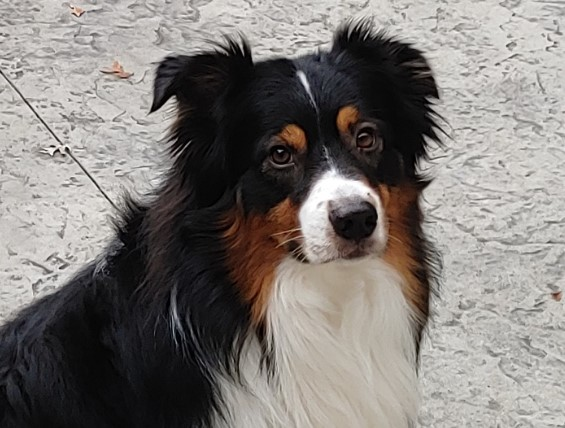

In [5]:
Test2.doc.ToString()

In [6]:
open System.Reflection

typeof<ScratchImage>.Assembly.GetManifestResourceNames()

[ ChickenScratch.Resources.ChickenScratch.png, FSharpSignatureData.ChickenScratch, FSharpOptimizationData.ChickenScratch ]


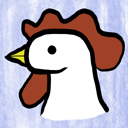

In [7]:
module Test3 =
    open ChickenScratch.HtmlExpressions

    let myImg = ScratchImage.FromResource typeof<ScratchImage>.Assembly "ChickenScratch.Resources.ChickenScratch.png"

    let doc = div {
        myImg.Style
        
        ul {
            li { myImg.Instance }
            li { myImg.WithPrototype( img { _width "64px" }).Instance }            
            li { myImg |> ScratchImage.WithPrototype (img { _width "32px" }) |> ScratchImage.AsInstance }            
        }
    }

Test3.doc


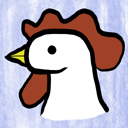

In [8]:
// Just an image

ScratchImage.FromResource typeof<ScratchImage>.Assembly "ChickenScratch.Resources.ChickenScratch.png"